In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation
import pickle
import numpy as np

Using TensorFlow backend.


In [ ]:
IMG_SIZE = 100
path = "/content/drive/My Drive/Colab Notebooks/face-mask-detector/"

x_train = pickle.load(open(path +"x1_train.pickle","rb"))
y_train = pickle.load(open(path +"y1_train.pickle","rb"))

x_test = pickle.load(open(path +"x1_test.pickle","rb"))
y_test = pickle.load(open(path +"y1_test.pickle","rb"))

# normalize the deta
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3500, 100, 100, 1)
(3500,)
(333, 100, 100, 1)
(333,)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(100, (3,3), activation='relu', input_shape=(100,100,1)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train,y_train, epochs = 30, batch_size = 32,validation_split= 0.1)

Train on 3150 samples, validate on 350 samples
Epoch 1/30
3150/3150 [==============================] - 12s 4ms/step - loss: 0.5572 - acc: 0.6892 - val_loss: 0.4654 - val_acc: 0.7743
Epoch 2/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3635 - acc: 0.8317 - val_loss: 0.3672 - val_acc: 0.8514
Epoch 3/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2736 - acc: 0.8933 - val_loss: 0.2993 - val_acc: 0.8800
Epoch 4/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2339 - acc: 0.9051 - val_loss: 0.2939 - val_acc: 0.8829
Epoch 5/30
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1838 - acc: 0.9213 - val_loss: 0.2643 - val_acc: 0.8886
Epoch 6/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.1273 - acc: 0.9492 - val_loss: 0.2428 - val_acc: 0.9057
Epoch 7/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.1289 - acc: 0.9502 - val_loss: 0.3108 - val_acc: 0.8857
Epoch 8/30
315

In [ ]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_test, y_test, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

[INFO] evaluating on testing set...
333/333 [==============================] - 0s 1ms/step
[INFO] loss=0.3754, accuracy: 93.6937%


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd

def show_results(model, num_predictions):
  predictions = model.predict(x_test[:num_predictions])
  #print(predictions)
  pred = []
  act = []

  for i in range (0,num_predictions):
    if(predictions[i][0]<predictions[i][1]):
      pred.append(0)
    else:
      pred.append(1)

    if(y_test[i][0]<y_test[i][1]):
      act.append(0)
    else:
      act.append(1)

  pred = np.array(pred)
  act = np.array(act)

  #print(pred)
  #print(act)
  cm = confusion_matrix(act,pred)
  print(cm)
  df_cm = pd.DataFrame(cm, range(2), range(2))
  # plt.figure(figsize=(10,7))
  sn.set(font_scale=1.4) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[[168   7]
 [ 14 144]]


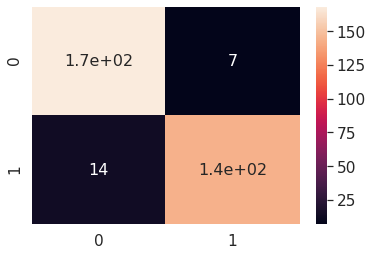

In [ ]:
show_results(model,333)

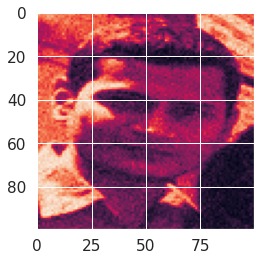

with mask -->  2.1116588e-09
without mask -->  1.0


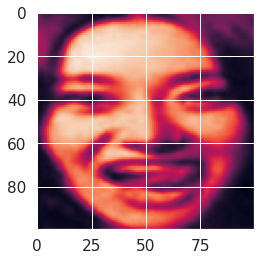

with mask -->  1.2414116e-12
without mask -->  1.0


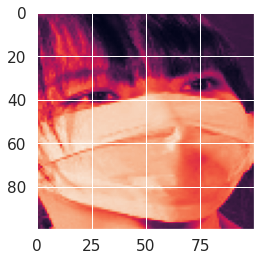

with mask -->  0.9999999
without mask -->  6.6478556e-08


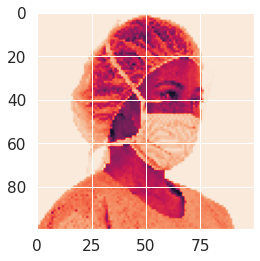

with mask -->  1.0
without mask -->  3.2008214e-09


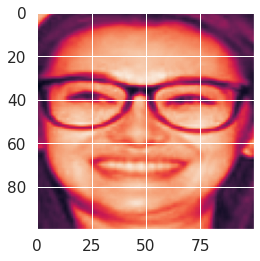

with mask -->  5.7852947e-07
without mask -->  0.9999994


In [ ]:
predictions = model.predict(x_test[:])
for i in range (5,10):
  pred_mask = predictions[i][0]
  pred_wmask = predictions[i][1]

  img = x_test[i]
  img = img.reshape(100,100)
  plt.imshow(img)
  plt.show()
  print("with mask --> ", pred_mask)
  print("without mask --> ", pred_wmask)

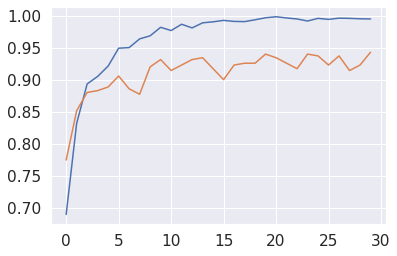

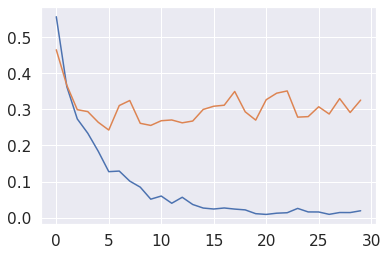

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# reduced learning rate with RMSprop optimizer and increased dropout layers
from keras.optimizers import RMSprop
model1 = Sequential()

model1.add(Conv2D(100, (3,3), activation='relu', input_shape=(100,100,1)))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(100, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))

opt = RMSprop(lr = 0.0001)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
history = model1.fit(x_train,y_train, epochs = 30, batch_size = 32,validation_split= 0.1)

Train on 3150 samples, validate on 350 samples
Epoch 1/30
3150/3150 [==============================] - 6s 2ms/step - loss: 0.6576 - acc: 0.6159 - val_loss: 0.5926 - val_acc: 0.7229
Epoch 2/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.5462 - acc: 0.7305 - val_loss: 0.5076 - val_acc: 0.7686
Epoch 3/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.4716 - acc: 0.7873 - val_loss: 0.4423 - val_acc: 0.8000
Epoch 4/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.4118 - acc: 0.8260 - val_loss: 0.4073 - val_acc: 0.8457
Epoch 5/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3537 - acc: 0.8562 - val_loss: 0.3605 - val_acc: 0.8686
Epoch 6/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3286 - acc: 0.8686 - val_loss: 0.3400 - val_acc: 0.8629
Epoch 7/30
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3028 - acc: 0.8737 - val_loss: 0.3333 - val_acc: 0.8429
Epoch 8/30
3150

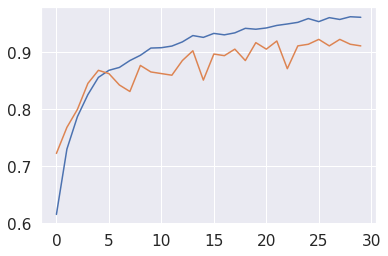

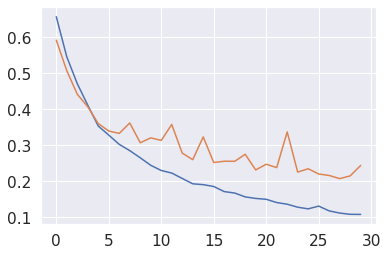

[INFO] evaluating on testing set...
333/333 [==============================] - 0s 772us/step
[INFO] loss=0.2639, accuracy: 91.5916%


In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model1.evaluate(x_test, y_test, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

[[167   8]
 [ 20 138]]


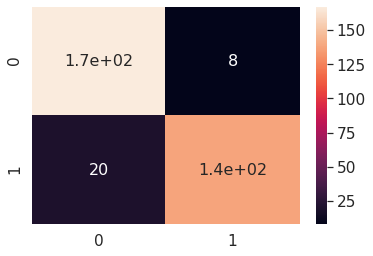

In [ ]:
show_results(model1,333)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os

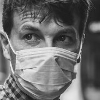

In [ ]:
path_images = "/content/drive/My Drive/Colab Notebooks/face-mask-detector/images"
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/face-mask-detector/haarcascade_frontalface_default.xml')

for img in os.listdir(path_images):
  img = cv2.imread(os.path.join(path_images,img))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  for (x, y, w, h) in faces:
      img_arr = gray[y-10:y+h+10, x-10:x+w+10]
      img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
      cv2_imshow(img_arr)

      
      img_arr = img_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

      img_arr = img_arr/255

      pred = model.predict(img_arr)
      print(pred)
      if pred[0][0]>pred[0][1]:
        color = (0,255,0)
        text = "with_mask"
      else:
        color = (0,0,255)
        text = "without_mask"
      
      cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
      cv2.putText(img, text, (x+w-100,y+h+20) , cv2.FONT_HERSHEY_COMPLEX, 0.8, color, 2)

  cv2_imshow(img)